In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv


In [2]:
df = pd.read_csv("/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv")
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [3]:
print("The information of data :\n")
df.info()



print("The Duplicates:\n")
df.duplicated().sum()

The information of data :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo        

0

In [4]:
print("The Missing Values:\n")
df.isnull().sum()

The Missing Values:



Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [5]:
df = df.drop(columns=['Unnamed: 0', "Uri", 'Url_spotify', 'Url_youtube', 'Description', 'Licensed', 'official_video'])
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.6130,0.772,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.0463,0.852,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.1160,0.551,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.0640,0.578,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.0698,0.525,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,6.172597e+08


In [6]:
audio_features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 
                  'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

In [7]:
df[audio_features] = df[audio_features].fillna(df[audio_features].median())
df.isnull().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           2
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Stream              576
dtype: int64

In [8]:
df = df.dropna(subset=['Views', 'Likes', 'Stream'])

df['Duration_ms'] = df["Duration_ms"].fillna(df['Duration_ms'].median())

df = df.drop(columns=['Title', 'Channel'])

print("Final missing values:\n", df.isnull().sum())

Final missing values:
 Artist               0
Track                0
Album                0
Album_type           0
Danceability         0
Energy               0
Key                  0
Loudness             0
Speechiness          0
Acousticness         0
Instrumentalness     0
Liveness             0
Valence              0
Tempo                0
Duration_ms          0
Views                0
Likes                0
Comments            75
Stream               0
dtype: int64


In [9]:
df.loc[:, 'Duration_ms'] = df['Duration_ms'].fillna(df['Duration_ms'].median())

In [10]:
df = df.dropna(subset=['Comments'])
df.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Views               0
Likes               0
Comments            0
Stream              0
dtype: int64

In [11]:
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08


In [12]:
df['is_viral'] = df['Views'].apply(lambda x: 1 if x >= 1_000_000 else 0)

df['is_viral'].value_counts(normalize=True)

is_viral
1    0.803478
0    0.196522
Name: proportion, dtype: float64

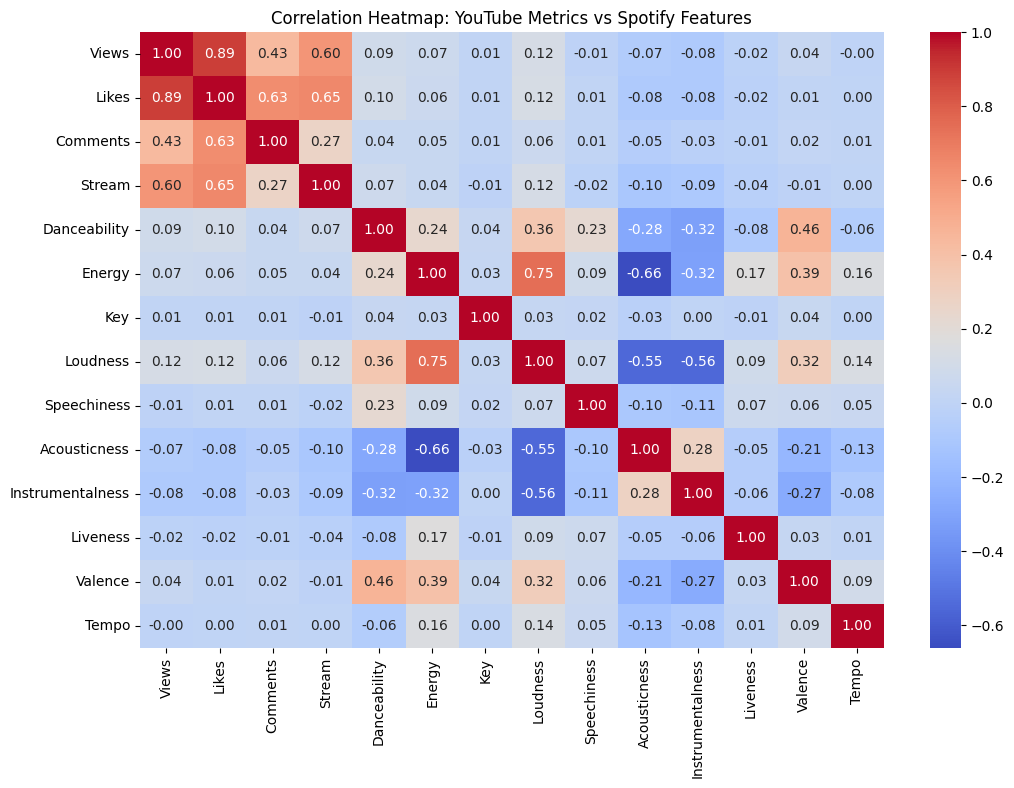

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_features = df[['Views', 'Likes', 'Comments', 'Stream'] + audio_features]

corr_matrix = corr_features.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: YouTube Metrics vs Spotify Features")
plt.show()

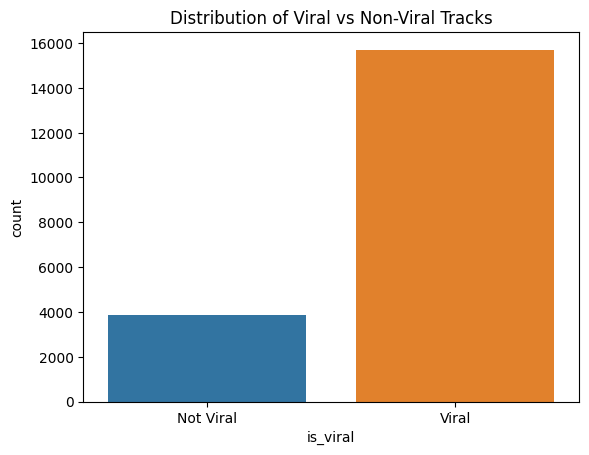

In [14]:
sns.countplot(data=df, x='is_viral')
plt.title("Distribution of Viral vs Non-Viral Tracks")
plt.xticks([0, 1], ['Not Viral', 'Viral'])
plt.show()

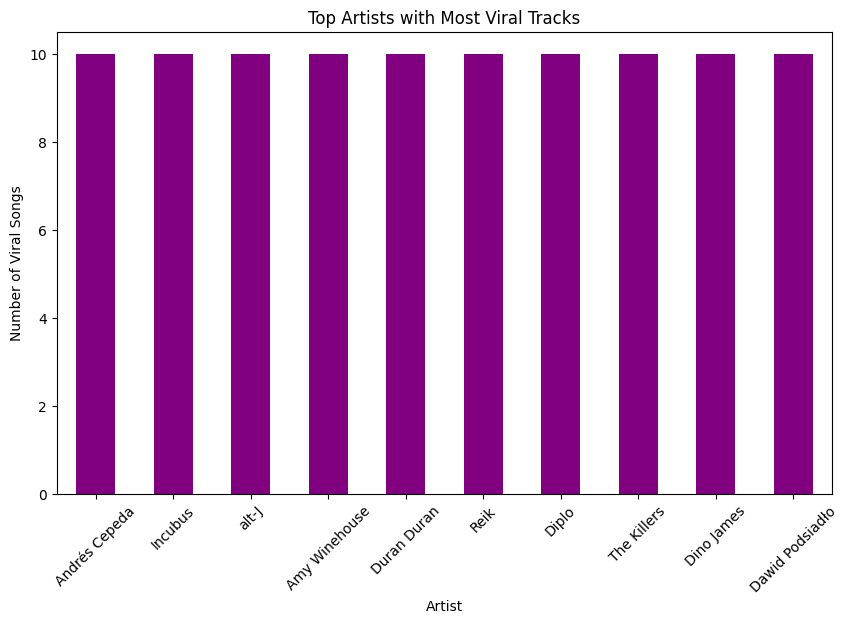

In [15]:
top_artists = df[df['is_viral'] == 1]['Artist'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='purple')
plt.title("Top Artists with Most Viral Tracks")
plt.ylabel("Number of Viral Songs")
plt.xticks(rotation=45)
plt.show()


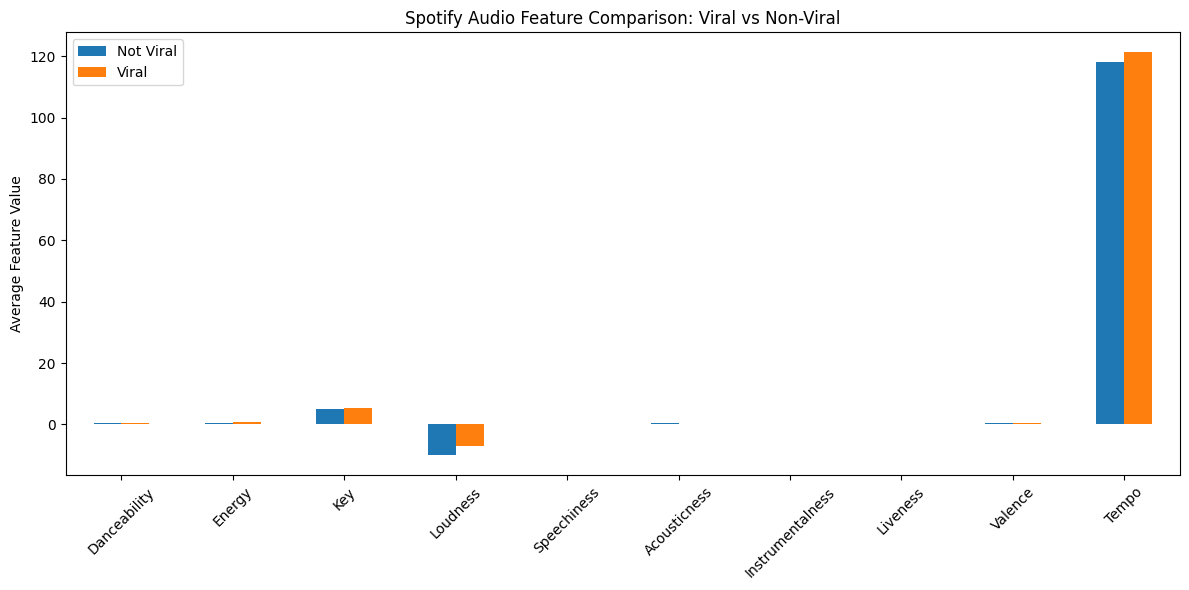

In [16]:
viral_comparison = df.groupby('is_viral')[audio_features].mean().T

viral_comparison.plot(kind='bar', figsize=(12,6))
plt.title("Spotify Audio Feature Comparison: Viral vs Non-Viral")
plt.ylabel("Average Feature Value")
plt.xticks(rotation=45)
plt.legend(["Not Viral", "Viral"])
plt.tight_layout()
plt.show()


In [17]:
features = audio_features + ['Duration_ms']

X = df[features]
y = df['is_viral']

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Repot:\n", classification_report(y_test, y_pred))

Accuracy: 0.8317135549872122

Classification Repot:
               precision    recall  f1-score   support

           0       0.75      0.22      0.34       768
           1       0.84      0.98      0.90      3142

    accuracy                           0.83      3910
   macro avg       0.79      0.60      0.62      3910
weighted avg       0.82      0.83      0.79      3910



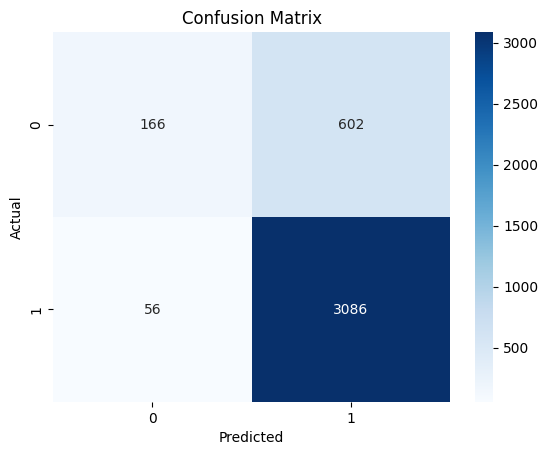

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [24]:
!pip install xgboost


In [25]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [26]:
# Convert to DMatrix (XGBoost's internal format)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [27]:
params = {
    'objective': 'binary:logistic',   # binary classification
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 5,
    'scale_pos_weight': len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # handle imbalance
    'seed': 42
}


In [28]:
xgb_model = xgb.train(params, dtrain, num_boost_round=100)


Accuracy: 0.7414322250639386

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.51      0.44       768
           1       0.87      0.80      0.83      3142

    accuracy                           0.74      3910
   macro avg       0.63      0.65      0.63      3910
weighted avg       0.77      0.74      0.75      3910



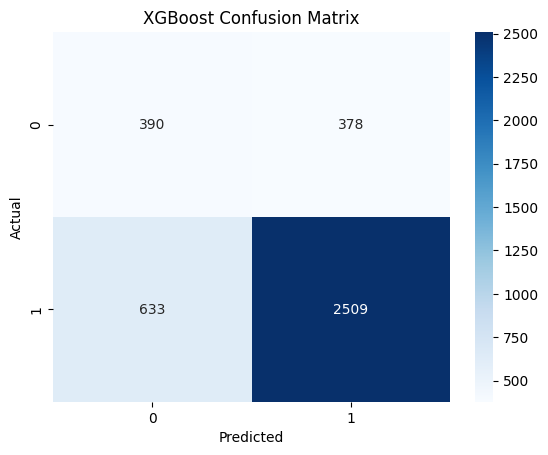

In [29]:
y_pred_proba = xgb_model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


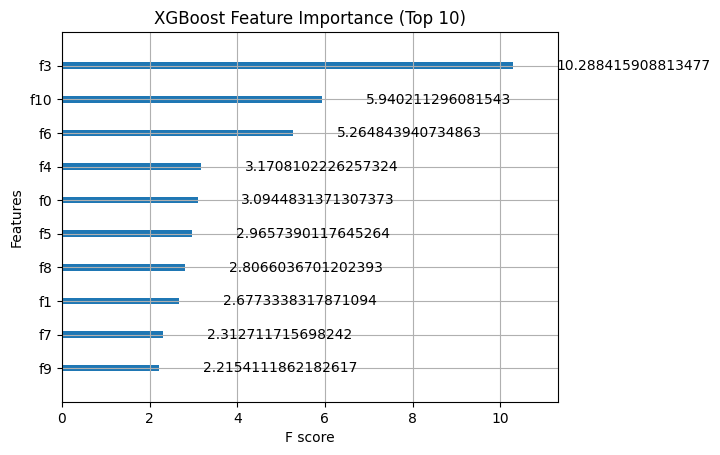

In [30]:
xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10)
plt.title("XGBoost Feature Importance (Top 10)")
plt.show()


In [31]:
import joblib

joblib.dump(xgb_model, "xgb_spotify_model.pkl")


['xgb_spotify_model.pkl']